In [113]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
import numpy as np
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))
import cv2

In [114]:
datasetdir = r'C:\Users\mg2ko\Desktop\Code and Data\DeepFashion\NTrain'
os.chdir(datasetdir)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 3

def DataLoad(shape, preprocessing): 
    '''Create the training and validation datasets for 
    a given image shape.
    '''
    imgdatagen = ImageDataGenerator(
        preprocessing_function = preprocessing,
        horizontal_flip = True, 
        validation_split = 0.1,
    )

    height, width = shape

    train_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
        classes = ['Blazer','Collar shirt','Designer saree','Hoodies',
                 'Jacket','jean pant','Oversized TShirt','shorts', 'Striped Shirt','Tshirt','Wide leg pants'],
        batch_size = batch_size,
        subset = 'training', 
    )

    val_dataset = imgdatagen.flow_from_directory(
        os.getcwd(),
        target_size = (height, width), 
         classes = ['Blazer','Collar shirt','Designer saree','Hoodies',
                 'Jacket','jean pant','Oversized TShirt','shorts', 'Striped Shirt','Tshirt','Wide leg pants'],
        batch_size = batch_size,
        subset = 'validation'
    )
    return train_dataset, val_dataset

In [115]:
vgg16 = keras.applications.vgg16
conv_model = vgg16.VGG16(weights='imagenet', include_top=False)


In [116]:
train_dataset, val_dataset = DataLoad((224,224), preprocessing=vgg16.preprocess_input)

Found 5076 images belonging to 11 classes.
Found 558 images belonging to 11 classes.


In [117]:
X_train, y_train = next(train_dataset)

In [118]:
conv_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [119]:
# flatten the output of the convolutional part: 
x = keras.layers.Flatten()(conv_model.output)
# three hidden layers
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
# final softmax layer with 15 categories
predictions = keras.layers.Dense(11, activation='softmax')(x)

# creating the full model:
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [120]:
for layer in conv_model.layers:
    layer.trainable = False

In [121]:
full_model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(lr=0.001),
                  metrics=['acc'])

In [228]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_dir=r'C:\Users\mg2ko\Desktop\Code and Data\DeepFashion\NTest'
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=3, class_mode='categorical')
# X_test, y_test = next(test_generator)

Found 3583 images belonging to 11 classes.


In [122]:
history = full_model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=0,
    epochs=3,
)

Epoch 1/3


C:\Users\mg2ko\AppData\Local\Temp\ipykernel_11440\3575376557.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = full_model.fit_generator(


1692/1692 [==============================] - 491s 290ms/step - loss: 1.3282 - acc: 0.6625 - val_loss: 0.9031 - val_acc: 0.7276
Epoch 2/3
1692/1692 [==============================] - 487s 288ms/step - loss: 0.5763 - acc: 0.8257 - val_loss: 0.6585 - val_acc: 0.8136
Epoch 3/3
1692/1692 [==============================] - 494s 292ms/step - loss: 0.3687 - acc: 0.8950 - val_loss: 0.6722 - val_acc: 0.7849


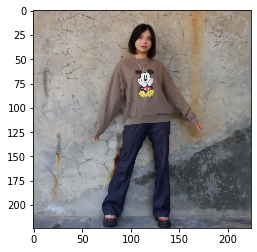

In [284]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

img_path = r'C:\Users\mg2ko\Desktop\Testing\5.jpg'
img_path1 = r'C:\Users\mg2ko\Desktop\NTesting\5.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img)

In [285]:
img = image.load_img(img_path1, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [286]:
def get_class_string_from_index(index):
   for class_string, class_index in test_generator.class_indices.items():
      if class_index == index:
         return class_string
    
preds = full_model.predict(x)
pred_labels = np.argmax(preds, axis=1)
print('Predicted_Class is:', pred_labels)     #Get the rounded value of the predicted class
true_index = 5
# print('true_label is:', true_labels)     #Get the rounded value of the predicted class
print("Predicted label: " + get_class_string_from_index(pred_labels))

Predicted_Class is: [5]
Predicted label: Oversized TShirt
